資料連結:<br>
Insurance Claim Analysis: Demographic and Health<br>
https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health?select=insurance_data.csv

# 檔案讀取

In [2]:
import pandas as pd

# Read CSV
df = pd.read_csv('/content/drive/MyDrive/insurance_data.csv')

print(df.head())

   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  


# 資料前處理

In [3]:
import pandas as pd

# 刪除缺失值
df.dropna(inplace=True)

# 替換字串
df['gender'] = df['gender'].map({'male':0, 'female':1})
df['diabetic'] = df['diabetic'].map({'No':0, 'Yes':1})
df['smoker'] = df['smoker'].map({'No':0, 'Yes':1})
df['region'] = df['region'].map({'southeast': 1, 'northeast': 2, 'southwest': 3, 'northwest': 4})

# 寫回文件
df.to_csv('file.csv', index=False)

print(df.head())

   index  PatientID   age  gender   bmi  bloodpressure  diabetic  children  \
0      0          1  39.0       0  23.2             91         1         0   
1      1          2  24.0       0  30.1             87         0         0   
7      7          8  19.0       0  41.1            100         0         0   
8      8          9  20.0       0  43.0             86         0         0   
9      9         10  30.0       0  53.1             97         0         0   

   smoker  region    claim  
0       0       1  1121.87  
1       0       1  1131.51  
7       0       4  1146.80  
8       0       4  1149.40  
9       0       4  1163.46  


# 繪製特徵與目標變數的相關係數熱力圖

Selected Features and Target Variable:
     claim  index  PatientID  smoker  bloodpressure    claim
0  1121.87      0          1       0             91  1121.87
1  1131.51      1          2       0             87  1131.51
7  1146.80      7          8       0            100  1146.80
8  1149.40      8          9       0             86  1149.40
9  1163.46      9         10       0             97  1163.46


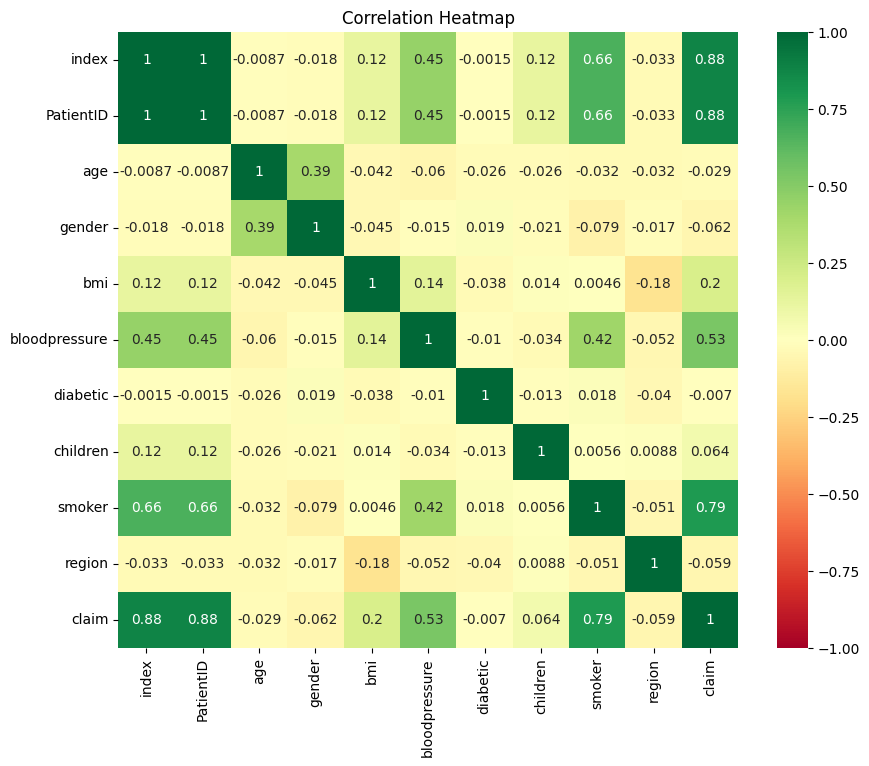

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(['claim'], axis=1)
y = df['claim']

# 計算特徵與目標變數的相關係數
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['claim'].abs().sort_values(ascending=False)

# 選擇相關係數大於閾值的特徵
threshold = 0.5
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# 保留選擇的特徵及目標變數
selected_df = df[selected_features + ['claim']]

# 顯示選擇的特徵及目標變數
print("Selected Features and Target Variable:")
print(selected_df.head())

# 繪製特徵與目標變數的相關係數熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 特徵的重要性

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 創建梯度提升樹模型
model = GradientBoostingRegressor()

# 訓練模型
model.fit(X, y)

# 獲取特徵重要性
feature_importance = model.feature_importances_

# 建立特徵重要性的DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 根據特徵重要性降序排列
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印特徵重要性
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
         Feature  Importance
6         smoker    0.720494
2            bmi    0.189273
3  bloodpressure    0.062612
0            age    0.010802
7         region    0.009297
5       children    0.006790
1         gender    0.000468
4       diabetic    0.000264


# 使用線性回歸模型進行訓練和預測

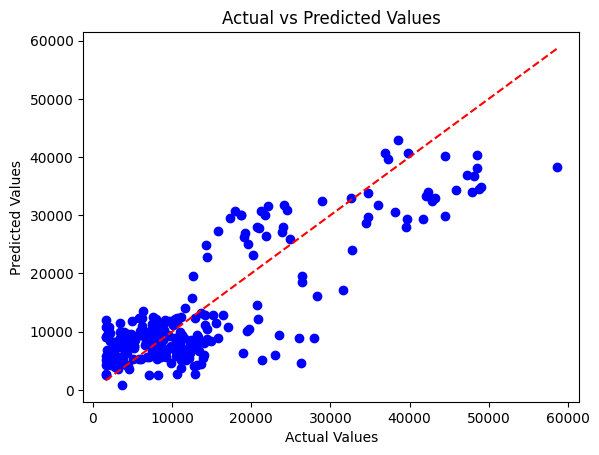


Mean Squared Error (MSE): 40478671.67471403
Root Mean Squared Error (RMSE): 6362.285098509342
Mean Absolute Error (MAE): 5035.937371779425
Mean Absolute Percentage Error (MAPE): 67.44629420695983
R squared: 0.7191572379031328


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np


# 提取特徵和目標變數

X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']



# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 創建線性回歸模型
model = LinearRegression()
# 使用訓練集訓練模型
model.fit(X_train_scaler, y_train)
# 使用訓練好的模型進行預測
y_pred = model.predict(X_test_scaler)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

# 使用多項式回歸模型進行訓練及預測

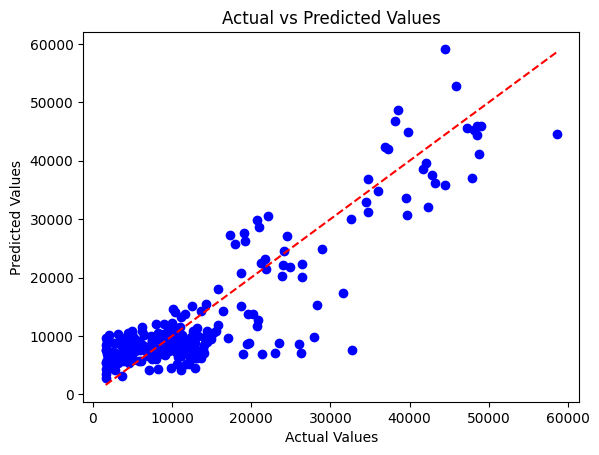


Mean Squared Error (MSE): 31613598.527908802
Root Mean Squared Error (RMSE): 5622.597133701543
Mean Absolute Error (MAE): 4341.17348237288
Mean Absolute Percentage Error (MAPE): 64.82894377817678
R squared: 0.7806634960320227


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 創建多項式特徵轉換器
poly = PolynomialFeatures()
# 將特徵資料轉換為多項式特徵
X_poly = poly.fit_transform(X)

# 將轉換後的特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 創建多項式回歸模型
model = LinearRegression()

# 使用訓練及訓練模型
model.fit(X_train_scaler, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test_scaler)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


# 使用梯度提升回歸模型進行訓練及預測

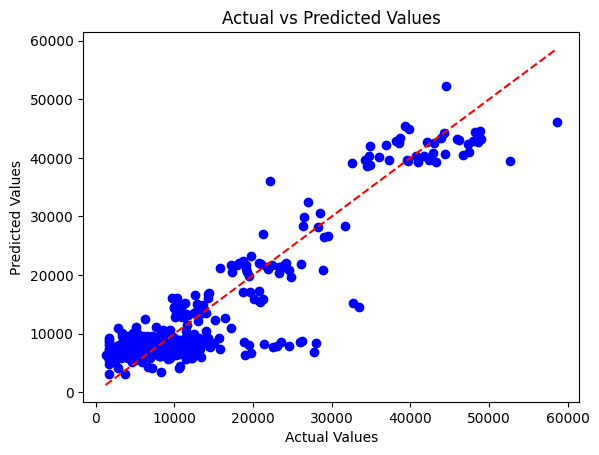


Mean Squared Error (MSE): 23965279.166160792
Root Mean Squared Error (RMSE): 4895.434522712033
Mean Absolute Error (MAE): 3751.5689944605365
Mean Absolute Percentage Error (MAPE): 57.39376727587357
R squared: 0.8324596472596937
--------------------------------------------------------


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 歸一化
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 創建梯度提升回歸模型
model = GradientBoostingRegressor()

# 使用訓練集訓練梯度提升回歸模型
model.fit(X_train_scaler, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test_scaler)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)


# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)
print('--------------------------------------------------------')



# 模型訓練-DecisionTreeRegressor

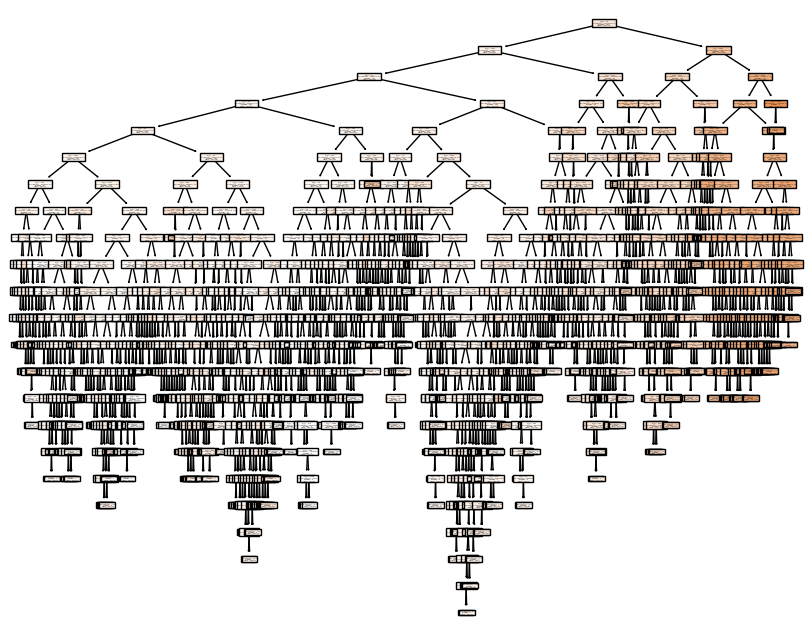

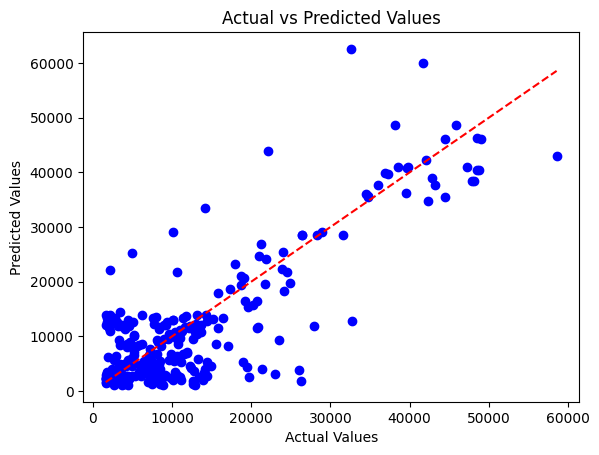


Mean Squared Error (MSE): 50333461.933383524
Root Mean Squared Error (RMSE): 7094.607947827951
Mean Absolute Error (MAE): 4969.443970037453
Mean Absolute Percentage Error (MAPE): 68.83659330779486
R squared: 0.6507842799570123


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 歸一化
# scaler = StandardScaler()
# X_train_scaler = scaler.fit_transform(X_train)
# X_test_scaler = scaler.transform(X_test)

# 創建決策樹回歸模型
model = DecisionTreeRegressor()

# 使用訓練集訓練決策樹回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)


# 繪製決策樹圖
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True)
plt.show()

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

# RandomForestRegressor

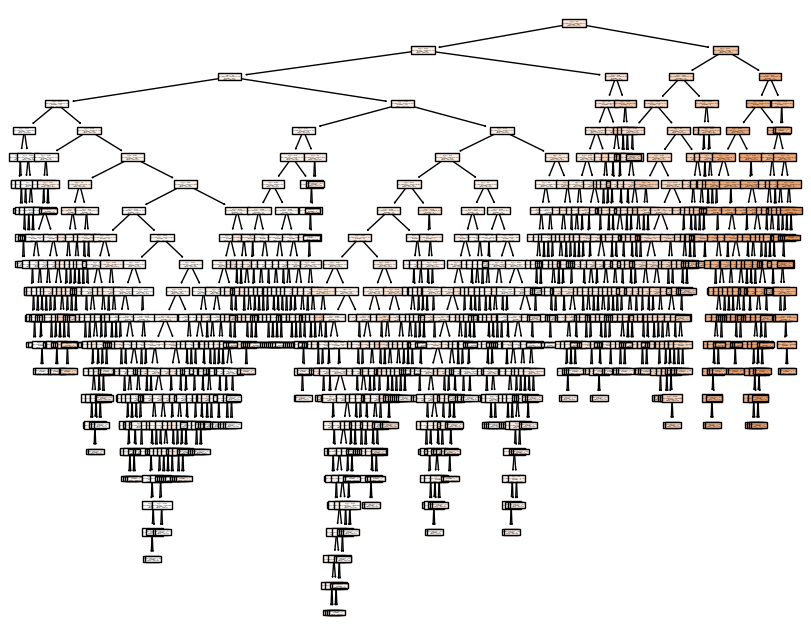

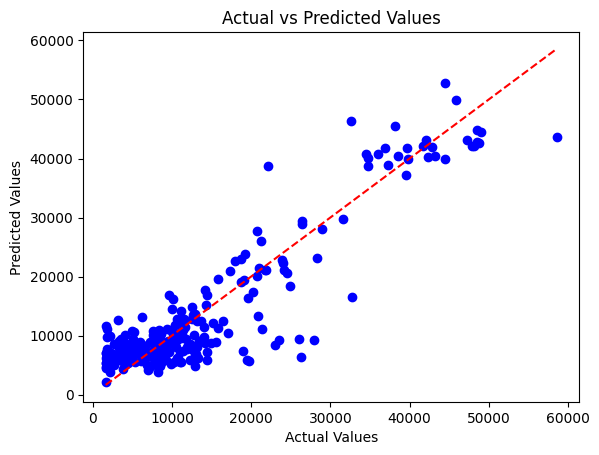


Mean Squared Error (MSE): 25502799.82804951
Root Mean Squared Error (RMSE): 5050.029685858243
Mean Absolute Error (MAE): 3821.5414134831453
Mean Absolute Percentage Error (MAPE): 60.46411841923255
R squared: 0.8230604797887421


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料正規化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建隨機森林回歸模型
model = RandomForestRegressor()

# 使用訓練集訓練隨機森林回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 繪製隨機森林中的一棵樹
plt.figure(figsize=(10, 8))
tree.plot_tree(model.estimators_[0], filled=True)
plt.show()

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)

10-fold

Cross Validation 1: MSE = 52744984.0168032, RMSE = 7262.5742004335625
Cross Validation 2: MSE = 45444786.35717771, RMSE = 6741.274831749386
Cross Validation 3: MSE = 36515864.07315805, RMSE = 6042.83576420525
Cross Validation 4: MSE = 20297001.602509003, RMSE = 4505.219373405584
Cross Validation 5: MSE = 21547568.626739945, RMSE = 4641.935870597519
Cross Validation 6: MSE = 34959257.18022206, RMSE = 5912.635383669625
Cross Validation 7: MSE = 32946393.51753818, RMSE = 5739.894904746791
Cross Validation 8: MSE = 66610980.1988908, RMSE = 8161.5550110803515
Cross Validation 9: MSE = 160272260.60990316, RMSE = 12659.86811186843
Cross Validation 10: MSE = 103233253.11632709, RMSE = 10160.37662275996


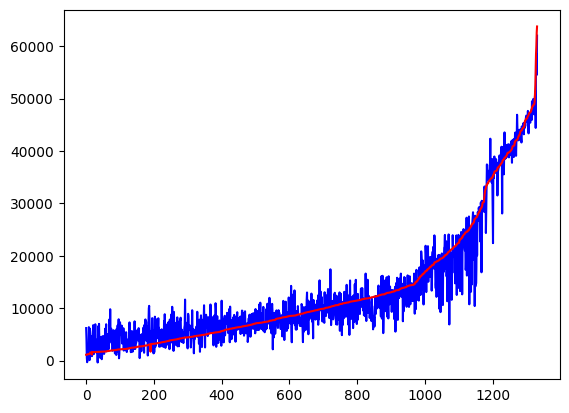

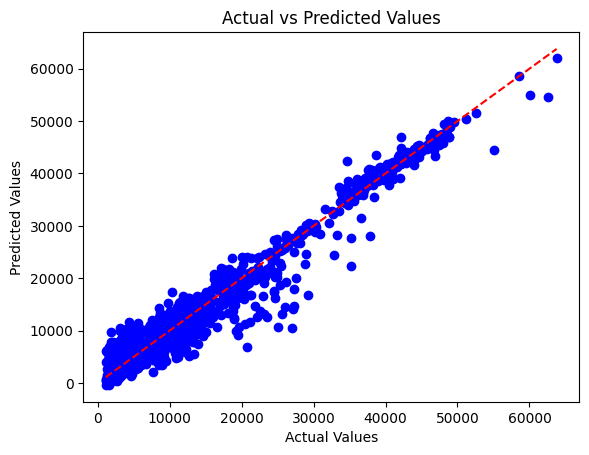


Mean Squared Error (MSE): 57457234.92992692
Root Mean Squared Error (RMSE): 7182.817007451646
Mean Absolute Error (MAE): 1990.7826970338956
Mean Absolute Percentage Error (MAPE): 32.88600441407458
R squared: 0.9472411839040615


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 創建梯度提升回歸模型
model = GradientBoostingRegressor(alpha=0.9, learning_rate=1, min_samples_split=2)
# 使用10次交叉驗證評估模型性能
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
mse = -  scores

# 計算均方根誤差（RMSE）
rmse = np.sqrt(mse)

# 使用訓練集訓練梯度提升回歸模型
model.fit(X, y)

# 使用訓練好的模型進行預測
y_pred = model.predict(X)

# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y - y_pred) / y)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ssr / sst)

# 顯示每次交叉驗證的結果
for i, score in enumerate(scores):
    print(f"Cross Validation {i+1}: MSE = {-score}, RMSE = {np.sqrt(-score)}")

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y, color='red')
plt.show()
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", np.mean(mse))
print("Root Mean Squared Error (RMSE):", np.mean(rmse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


# K最近鄰回歸

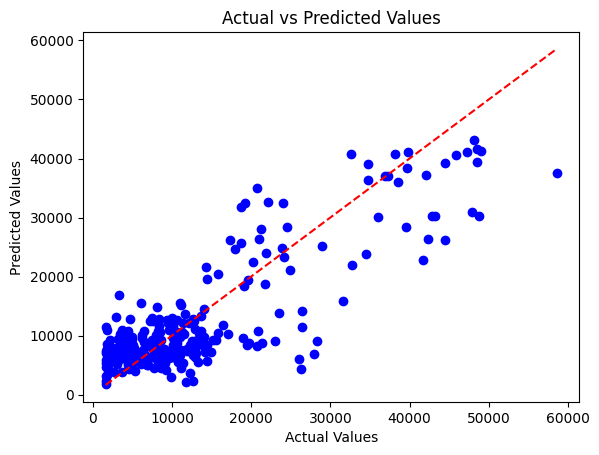


Mean Squared Error (MSE): 42524229.447209194
Root Mean Squared Error (RMSE): 6521.060454190652
Mean Absolute Error (MAE): 4869.259430711611
Mean Absolute Percentage Error (MAPE): 65.4241415563666
R squared: 0.7049650702482064


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 資料歸一化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 創建K最近鄰回歸模型
model = KNeighborsRegressor()

# 使用訓練集訓練K最近鄰回歸模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


# NN 類神經網路

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}


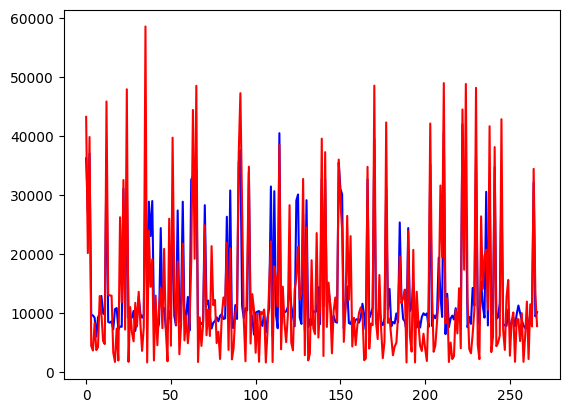

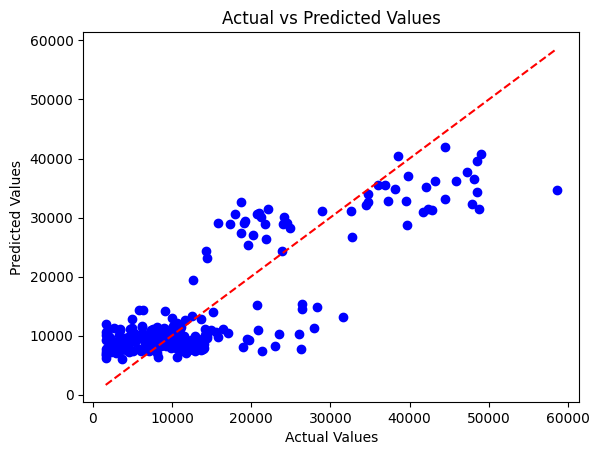


Mean Squared Error (MSE): 41408801.27771409
Root Mean Squared Error (RMSE): 6434.967076661239
Mean Absolute Error (MAE): 5144.6993150868775
Mean Absolute Percentage Error (MAPE): 81.90184415744267
R squared: 0.7127039587808888


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將特徵資料切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義要調整的參數範圍
param_grid = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# 創建類神經網絡回歸模型
model = MLPRegressor()

# 使用 GridSearchCV 尋找最佳參數組合
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 獲取最佳參數組合
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳參數組合的模型進行預測
model = MLPRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y_test, color='red')
plt.show()

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)


# GRU(Gated Recurrent Unit)

Epoch 1/100
34/34 [==============================] - 4s 37ms/step - loss: 259898240.0000
Epoch 2/100
34/34 [==============================] - 1s 32ms/step - loss: 133497712.0000
Epoch 3/100
34/34 [==============================] - 1s 32ms/step - loss: 141281392.0000
Epoch 4/100
34/34 [==============================] - 1s 23ms/step - loss: 125182328.0000
Epoch 5/100
34/34 [==============================] - 1s 23ms/step - loss: 121629520.0000
Epoch 6/100
34/34 [==============================] - 1s 21ms/step - loss: 117414320.0000
Epoch 7/100
34/34 [==============================] - 1s 20ms/step - loss: 109443464.0000
Epoch 8/100
34/34 [==============================] - 1s 23ms/step - loss: 102704056.0000
Epoch 9/100
34/34 [==============================] - 1s 24ms/step - loss: 103748408.0000
Epoch 10/100
34/34 [==============================] - 1s 24ms/step - loss: 97996192.0000
Epoch 11/100
34/34 [==============================] - 1s 23ms/step - loss: 100870720.0000
Epoch 12/100
34/34 [

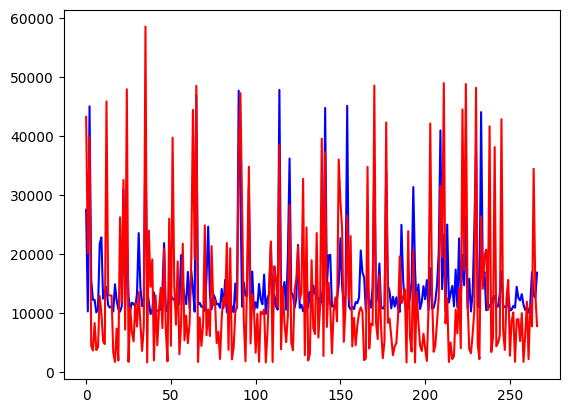

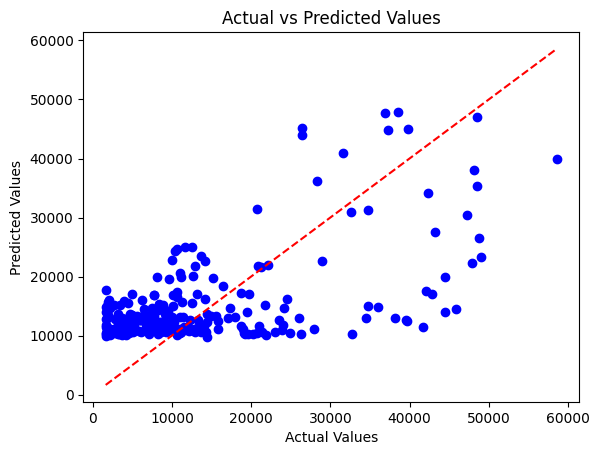


Mean Squared Error (MSE): 96093082.71050568
Root Mean Squared Error (RMSE): 9802.707927430343
Mean Absolute Error (MAE): 7781.092254213483
Mean Absolute Percentage Error (MAPE): 127.80139077822102
R squared: 0.33330206624148595


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import Dropout

# 提取特徵和目標變數
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# 將數據集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建GRU模型
model = Sequential()
model.add(GRU(256, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5, input_shape=(60,)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5, input_shape=(60,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 編譯模型
model.compile(loss='mean_squared_error', optimizer='adam')

# 將特徵資料轉換為三維形式
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# 使用訓練集訓練模型
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 使用訓練好的模型進行預測
y_pred = model.predict(X_test)

# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 計算均方根誤差（RMSE）
rmse = mean_squared_error(y_test, y_pred, squared=False)
# 計算平均絕對誤差（MAE）
mae = mean_absolute_error(y_test, y_pred)
# 計算平均絕對百分比誤差（MAPE）
# 將預測值和實際值轉換為一維數組
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 計算 R squared
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# 可視化預測值和實際值
plt.figure()
plt.plot(range(len(y_pred)), y_pred, color='blue')
plt.plot(range(len(y_pred)), y_test, color='red')
plt.show()

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

print()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R squared:", r_squared)
